# This Assignment is done by N M Emran Hussain, GWID:24414095

# Assignment 2

# <font color='red'> Conceptual Questions</font>

## <font color='red'> T/F Question: </font> Bagging reduces both the variance and bias of decision trees by averaging multiple pruned trees trained on bootstrapped datasets. [10 pts]

Answer: False. While bagging reduces variance, and pruning also reduces variance in individual trees, the averaging in bagging doesn't directly address bias, and the base learners in bagging are often not heavily pruned to maximize the benefit of aggregation.

## <font color='red'> T/F Question: </font> Random Forest improves upon Bagging by decorrelating the trees through randomly selecting a subset of predictors at each split. [10 pts]

Answer: True

## <font color='red'> T/F Question: </font> In gradient boosting, all trees are trained independently in parallel to speed up the learning process. [10 pts]

Answer: False. The overall training of the ensemble of trees remains inherently 'sequential'. The core principle of boosting relies on learning from the errors of the previous models.

## <font color='red'> T/F Question: </font> Principal Component Analysis (PCA) reduces dimensionality by projecting data onto a lower-dimensional space that best preserves the variance in the original data. [10 pts]


Answer: True

# <font color='red'> Practice Problems:</font> Complete the tasks below.

Capital Bikeshare Station Management

### Read data from drive or local

In [2]:
import pandas as pd
# Read csv files

df_Feb = pd.read_csv('202402-capitalbikeshare-tripdata.csv')
df_Mar = pd.read_csv('202403-capitalbikeshare-tripdata.csv')
df_Apr = pd.read_csv('202404-capitalbikeshare-tripdata.csv')

# concat data
df=pd.concat([df_Feb, df_Mar,df_Apr])
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2024-02-06 17:15:33,2024-02-06 17:30:33,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2024-02-26 13:19:42,2024-02-26 13:30:44,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2024-02-02 11:01:22,2024-02-02 11:05:14,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2024-02-25 08:28:18,2024-02-25 08:48:44,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


### All the location of stations

In [3]:
import pandas as pd

# Get unique start station names and their corresponding latitude and longitude
Stations = df[['start_station_name', 'start_lat', 'start_lng']].drop_duplicates()

# Group by 'start_station_name' and keep only the first row of each group
Stations = Stations.groupby('start_station_name').first().reset_index()

# Rename columns
Stations = Stations.rename(columns={'start_lat': 'Latitude', 'start_lng': 'Longitude'})

# Set display option to show all rows
pd.set_option('display.max_rows', 800)  # Slightly more than 786 to ensure complete display
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Prevent line-wrapping
pd.set_option('display.max_colwidth', None)  # Show full content in each cell

# Display the result
Stations.head()


,start_station_name,Latitude,Longitude
0,10th & E St NW,38.895924,-77.026147
1,10th & G St NW,38.898243,-77.026235
2,10th & H St NE,38.899998,-76.992690
3,10th & K St NW,38.902521,-77.026312
4,10th & Monroe St NE,38.932449,-76.993457


## <font color="red"> Task 1: </font>	Visualize all station locations origins. [10 pts]
[Map layer is not required.]

Answer:

This code snippet visualizes the geographic locations of bikeshare stations using a scatter plot. First, it extracts only the longitude and latitude columns from the Stations dataframe and stores them as X_station. Then, it creates a plot with a specified figure size (10 inches wide by 8 inches tall). Each station is plotted as a point on the scatter plot, with some transparency (alpha=0.7) and a black edge color (edgecolor='k') for better visibility. The plot is labeled with a title ("Bikeshare Station Origins") and axis labels ("Longitude" and "Latitude"), with font sizes adjusted for clarity. Tick labels are made slightly larger, a grid is added to make the plot easier to read, and tight_layout() is called to ensure the labels and titles fit well within the figure. Finally, the plot is displayed using plt.show(). Overall, the code provides a clear visual overview of where the bikeshare stations are located geographically.

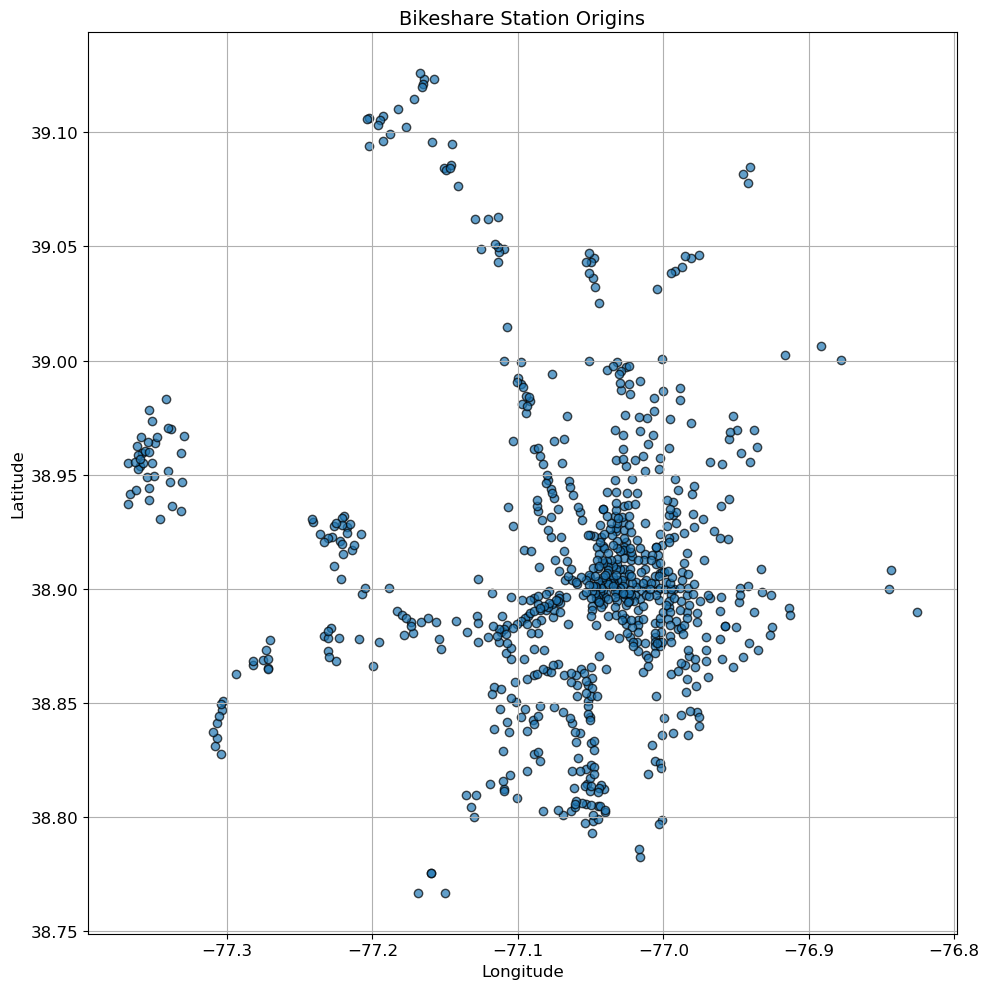

In [4]:
import matplotlib.pyplot as plt

# Only keep the coordinates from the Stations dataframe
X_station = Stations[['Longitude', 'Latitude']]

# Show the data points
plt.figure(figsize=(10, 10))
plt.scatter(X_station['Longitude'], X_station['Latitude'], alpha=0.7, edgecolor='k')
plt.title('Bikeshare Station Origins', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tick_params(labelsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


## The bike sharing operator needs to send out crew with each managing a cluster of some bike stations (for daily operations such as bike repositioning, docking, and repair).

## <font color="red"> Task 2: </font> 	Simply use k-means clustering to cluster all bike docking stations for k value from 2 to 50 and plot the curve for within-cluster sum of squares (WSS) vs k. Discuss your choice of the number of crew, say $k^*$, based on the curve. (We will use this $k^*$ value throughout the following questions.) [10 pts]

Answer:

This code determines the optimal number of clusters for bikeshare stations using the Elbow Method with K-Means clustering. First, it imports necessary libraries and suppresses any warnings for cleaner output. It selects the longitude and latitude coordinates of the stations from the Stations dataframe (X_station). Then, it initializes an empty list wss to store the within-cluster sum of squares (WSS), which measures how tightly the data points are clustered around the centroids. The code iterates through different numbers of clusters (from K=2 to K=50), fits a K-Means model for each k, and records the WSS (inertia) after fitting. After collecting WSS values for all K, it plots the WSS versus number of clusters curve, where the "elbow" (sharp bend) suggests an appropriate K value. Finally, based on visual inspection, it manually chooses k=10 as the number of clusters and prints this choice. In short, the code is aimed at finding the best K for clustering bike stations by minimizing clustering error while avoiding overfitting. The curve drops steeply up to about K = 10. After K = 10, the curve starts to flatten, meaning adding more clusters doesn't significantly reduce the Within-Cluster Sum of Squares (WSS) anymore. This "elbow" or "knee" point typically signals the best trade-off between cluster compactness and number of clusters.

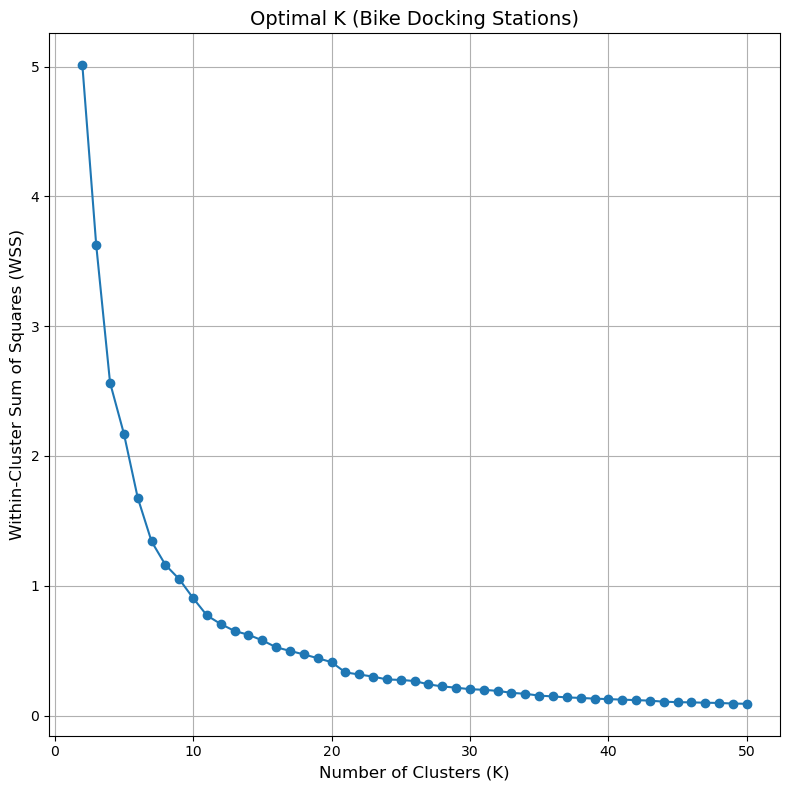

Chosen k*: 10


In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

# Use the coordinates of the stations
X_station = Stations[['Longitude', 'Latitude']]

# Store WSS (inertia) for each K
wss = []

# Try K from 2 to 50
K_range = range(2, 51)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_station)
    wss.append(kmeans.inertia_)  

# Plot the WSS curve (Elbow Method)
plt.figure(figsize=(8, 8))
plt.plot(K_range, wss, marker='o')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WSS)', fontsize=12)
plt.title('Optimal K (Bike Docking Stations)', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Choice of the number of crew
k = 10
print(f"Chosen k*: {k}")

## <font color="red"> Task 3: </font>  Given your choice of optimal k*. Visualize the clusters of stations from k-means clustering. [10 pts]

Answer:

This code performs K-Means clustering on bikeshare station coordinates to group them into 10 clusters, aiming to create efficient crew zones. It first extracts the longitude and latitude columns from the Stations dataframe (X_station). Then, it fits a K-Means model with K=10, predicting the cluster assignment for each station (clusters) and computing the coordinates of each cluster centroid (centers). These cluster labels are added back to the Stations dataframe for reference. Finally, it visualizes the clustered stations on a scatter plot, where each station is colored by its assigned cluster, and the centroids are highlighted with large red "X" markers. The plot is customized with a title, labeled axes, a legend, and a grid to improve readability. Overall, the code segments the bikeshare system into 10 operational zones, making it easier to plan tasks like crew deployment or maintenance scheduling based on station proximity.

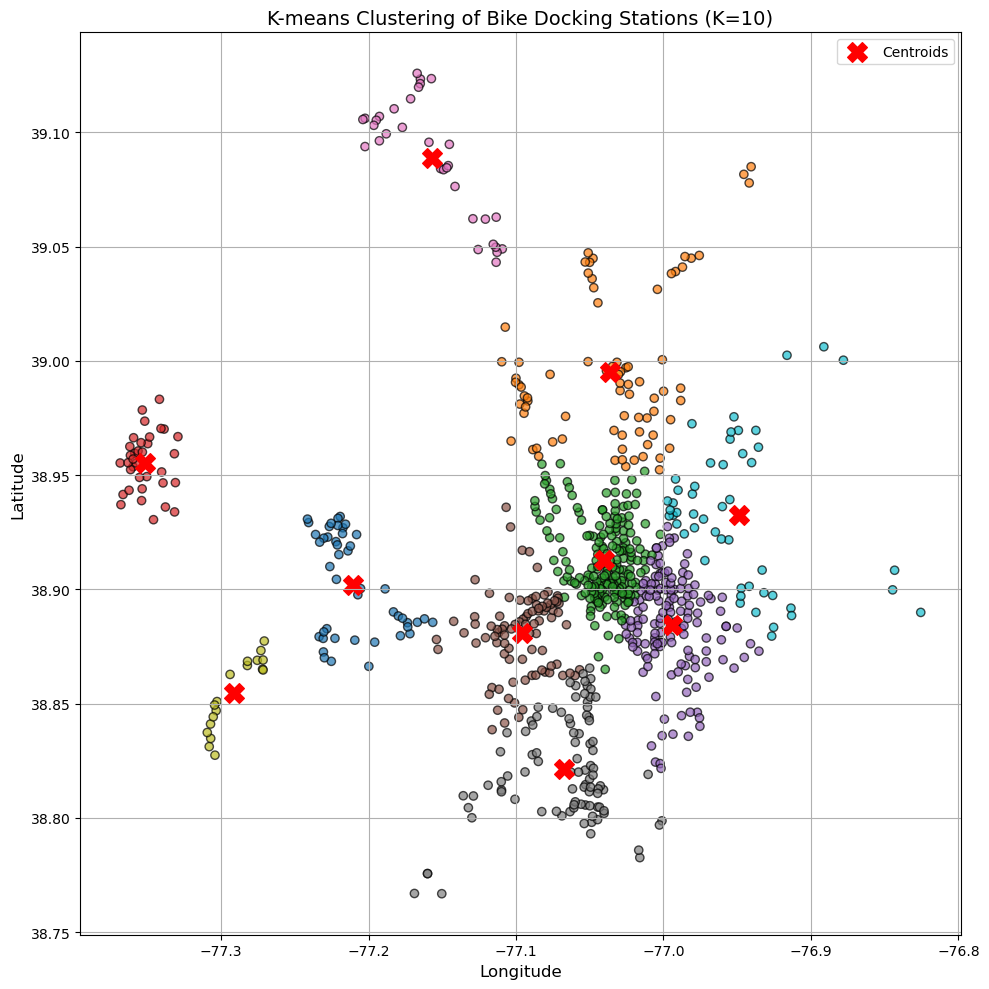

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use coordinates of bike stations
X_station = Stations[['Longitude', 'Latitude']]

# K-means clustering with K=10
K = 10 # Balances model simplicity and performance to segment the city into 10 efficient crew zones for nearby docking stations.
kmeans = KMeans(n_clusters=K, random_state=0)
clusters = kmeans.fit_predict(X_station)  # Get cluster assignments
centers = kmeans.cluster_centers_         # Get centroids

# Add cluster labels to the DataFrame (optional but helpful)
Stations['Cluster'] = clusters

# Plot the clustered stations
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_station['Longitude'], X_station['Latitude'], 
                      c=clusters, cmap='tab10', alpha=0.7, edgecolor='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')

# Plot aesthetics
plt.title("K-means Clustering of Bike Docking Stations (K=10)", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## <font color="red"> Task 4: </font>  As discussed in class, the objective function in k-means clustering may not be appropriate. If we want to minimize the total distance, the crew visits bike stations from the center. Instead, we will use k-median clustering that considers Manhattan distance.  Please find the $k^*$ clusters using k-median clustering and visualize them. [10 pts]

Answer:

In [7]:
!pip install pyclustering

This code performs K-Medians clustering on the bikeshare station locations using the Manhattan distance (city-block distance), which is more realistic for grid-like urban layouts. It first selects the longitude and latitude of the stations (X_station) and sets K=10 clusters. Then, it randomly initializes 10 starting medians using random_center_initializer. It defines the Manhattan distance as the metric for clustering. After setting up, it runs the K-Medians algorithm using pyclustering, which groups the station points into clusters and computes the median (central) station of each cluster. Each station is then assigned a cluster label, and the results are visualized with a scatter plot: stations are colored by their clusters, and the cluster medians are marked with large red "X" symbols. The plot is formatted with titles, labels, and a grid. Overall, this code segments the city’s bikeshare network into 10 logical clusters that are more resistant to outliers and better aligned with realistic street travel distances.

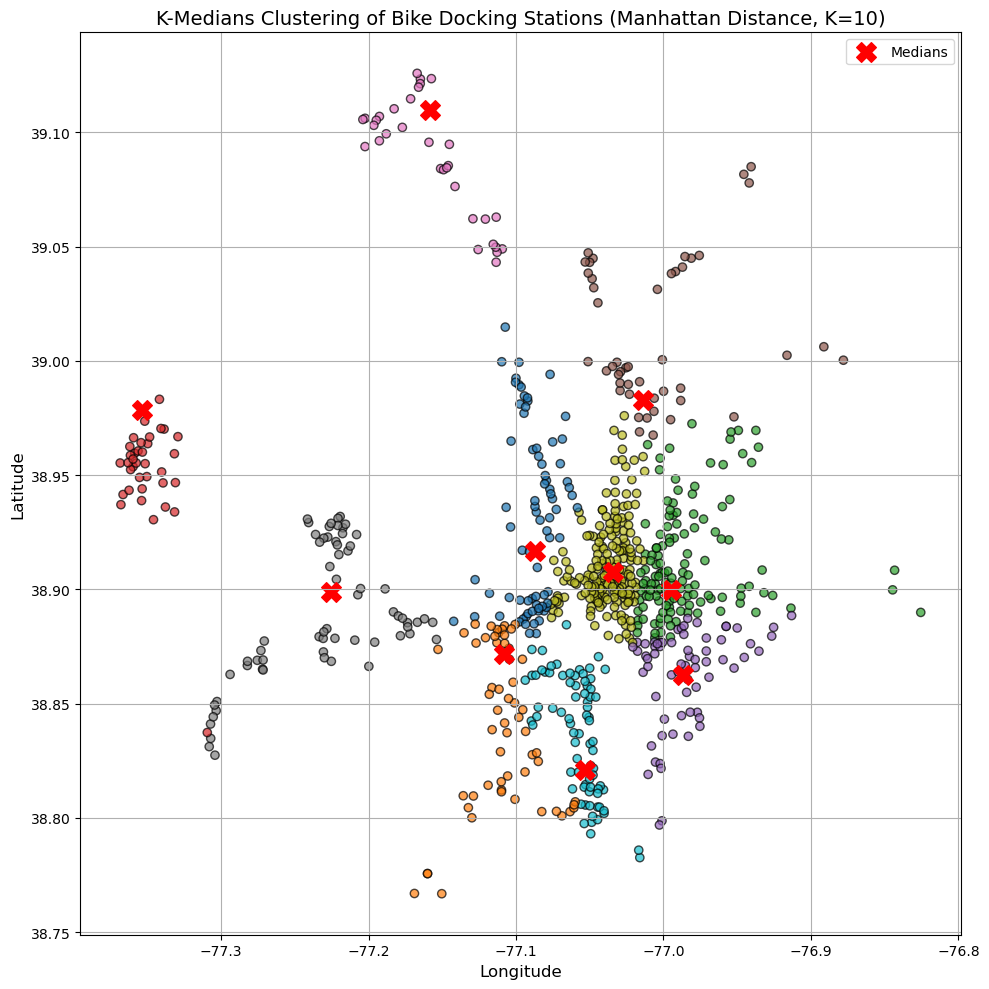

In [8]:
# Required imports
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.utils.metric import distance_metric, type_metric

# Select the coordinates of stations
X_station = Stations[['Longitude', 'Latitude']]

# Set the number of clusters
K = 10

# Randomly initialize K median centers
initial_medians = random_center_initializer(X_station.values, K).initialize()

# Define the Manhattan distance metric
manhattan_metric = distance_metric(type_metric.MANHATTAN)

# Initialize and run the K-Medians clustering
kmedians_instance = kmedians(X_station.values.tolist(), initial_medians, metric=manhattan_metric)
kmedians_instance.process()

# Get clusters (as lists of indices) and medians
cluster_instances = kmedians_instance.get_clusters()
centers = np.array(kmedians_instance.get_medians())

# Create cluster labels for each point
clusters = np.zeros(len(X_station), dtype=int)
for cluster_index, data_indices in enumerate(cluster_instances):
    clusters[data_indices] = cluster_index

# Plot the clusters
plt.figure(figsize=(10,10))
plt.scatter(X_station['Longitude'], X_station['Latitude'], c=clusters, cmap='tab10', edgecolor='k', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Medians')

# Plot formatting
plt.title("K-Medians Clustering of Bike Docking Stations (Manhattan Distance, K=10)", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## <font color="red"> Task 5: </font>  If BlueBike wants to setup a depot for each crew member at a selected bike station, we can conduct k-medoids clustering to identify the centers and recommend them as the depots. Please identify the $k^*$ clusters and their centers from k-medoids clustering and visualize them. [10 pts]

Answer:

This code applies K-Medoids clustering to the bikeshare station coordinates to identify 10 real bike stations as cluster centers (medoids), which can serve as recommended depot locations for operations. It first extracts longitude and latitude from the Stations dataframe and randomly selects K=10 initial stations as starting medoids. Using the pyclustering library's kmedoids method, it clusters the stations, minimizing the total dissimilarity based on actual station points rather than computed centers. Each station is assigned a cluster label (Cluster_kmedoids), and the medoid stations (depots) are printed, showing their names and coordinates. The code then visualizes the clusters: stations are colored by their assigned cluster, and depot stations are highlighted with large red "X" markers. The plot includes grid lines, titles, and labels for clarity. Overall, this code practically segments the bikeshare system into 10 service zones based on real station locations, making it ideal for planning crew deployment or equipment dispatch from actual existing stations rather than theoretical midpoints.

Recommended Depot Stations:
                                 start_station_name   Latitude  Longitude
519  Montgomery College / W Campus Dr & Mannakee St  39.095661 -77.159048
670                          Sligo Ave & Carroll Ln  38.990877 -77.016212
304                 Commonwealth Ave & E Monroe Ave  38.820058 -77.062821
212                  8th & Eye St SE / Barracks Row  38.879200 -76.995300
741                      Washington Blvd & 7th St N  38.880810 -77.090792
610                      Prosperity Ave & Avenir Pl  38.881416 -77.230338
776                   Wisconsin Ave & Ingomar St NW  38.958267 -77.084636
375                    Fort Lincoln Dr & 33rd Pl NE  38.921682 -76.955689
56                    14th St & Rhode Island Ave NW  38.908487 -77.032403
735     W&OD Trail/Sunset Hills Rd & Old Reston Ave  38.955022 -77.351524


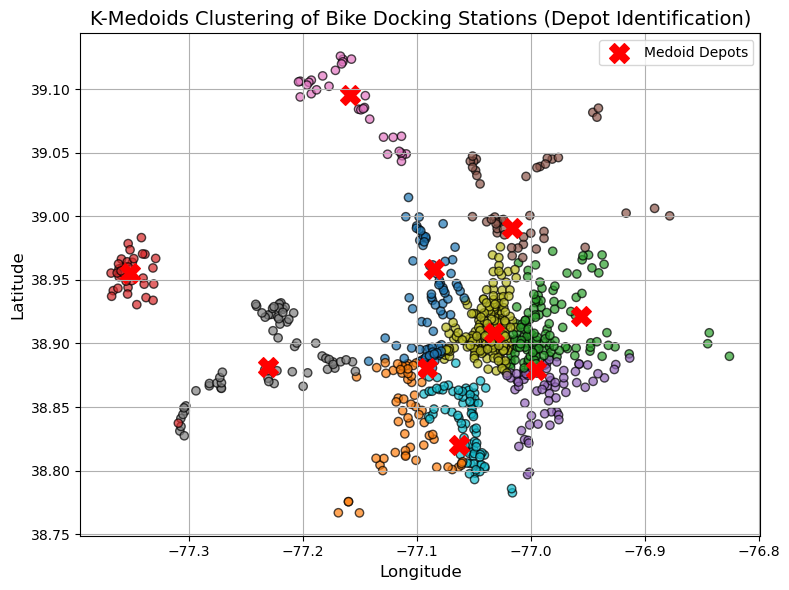

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster.kmedoids import kmedoids

# Use bike station coordinates
X_station = Stations[['Longitude', 'Latitude']]

# Define number of clusters
K = 10

# Randomly choose K unique indices from the data as initial medoids
initial_medoids = np.random.choice(range(len(X_station)), size=K, replace=False)

# Create and run the K-Medoids algorithm
kmedoids_instance = kmedoids(X_station.values, initial_medoids)
kmedoids_instance.process()

# Get clusters (as index lists) and medoid indices
cluster_instances = kmedoids_instance.get_clusters()
center_index = kmedoids_instance.get_medoids()
centers = X_station.values[center_index, :]  # Get actual coordinates of medoids

# Assign cluster labels
Stations['Cluster_kmedoids'] = -1
for cluster_idx in range(k):
    Stations.loc[clusters[cluster_idx], 'Cluster_kmedoids'] = cluster_idx

# Get depot stations
depot_stations = Stations.iloc[center_index][['start_station_name', 'Latitude', 'Longitude']]
print("Recommended Depot Stations:")
print(depot_stations)

# Plot the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_station['Longitude'], X_station['Latitude'], c=clusters, cmap='tab10', edgecolor='k', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Medoid Depots')

# Aesthetics
plt.title("K-Medoids Clustering of Bike Docking Stations (Depot Identification)", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## <font color="red"> Task 6: </font>  Conduct hierarchical clustering to generate the $k^*$ clusters and visualize them. [10 pts]

Answer:

This code performs hierarchical clustering on bikeshare station coordinates and visualizes the clustering process using a dendrogram. It first selects the longitude and latitude data from the Stations dataframe (X_station). Using the linkage function from scipy.cluster.hierarchy with Ward’s method, it creates a linkage matrix Z, which measures the "distance" between clusters by minimizing the total within-cluster variance. Then, it plots a dendrogram, which graphically shows how individual stations merge step-by-step into larger clusters. The truncate_mode='lastp' and p=20 settings simplify the dendrogram by showing only the last 20 merges for better readability. The plot is customized with a title, and labeled axes for station index and linkage distance. Overall, this code gives a tree-like visualization of the station clustering hierarchy, helping planners understand at what distance stations naturally group together and making it easier to choose an appropriate number of clusters.

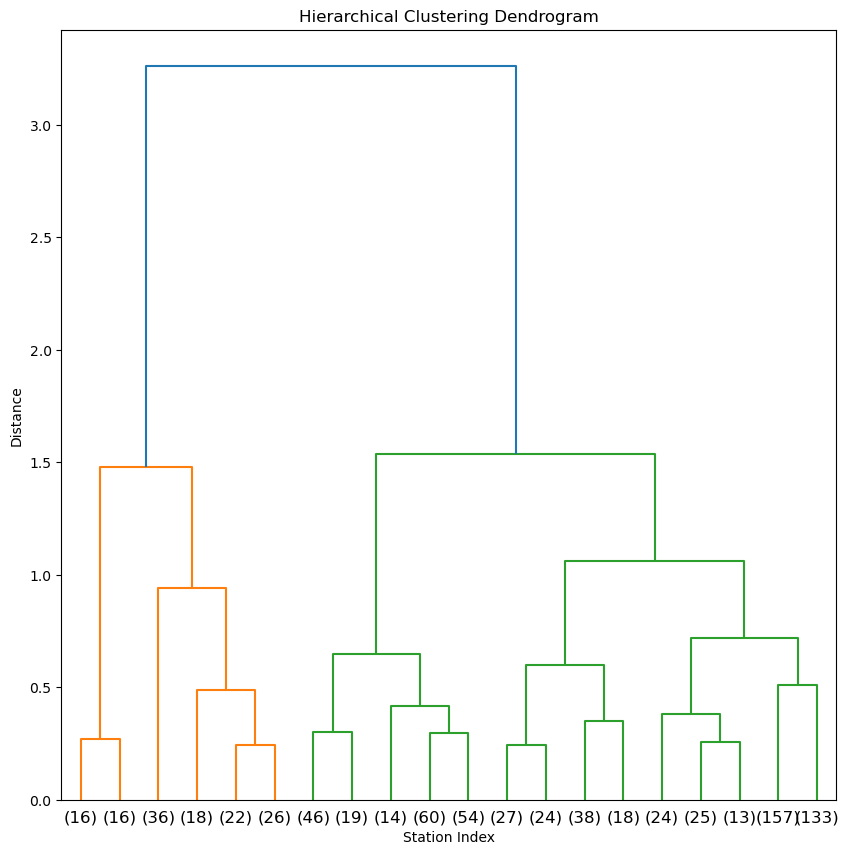

In [10]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np

# Use coordinates of bike docking stations
X_station = Stations[['Longitude', 'Latitude']]

# Generate the linkage matrix using Ward's method
Z = linkage(X_station, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 10))
dendrogram(Z, truncate_mode='lastp', p=20)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Station Index')
plt.ylabel('Distance')
plt.show()

This code finalizes the hierarchical clustering by cutting the dendrogram to create exactly 10 clusters. It uses the fcluster function, setting t=k (with k=10) and the criterion='maxclust' to assign each bike station to one of the 10 clusters based on the linkage matrix Z created earlier. The resulting cluster labels are slightly adjusted to be 0-indexed (clusters - 1) and stored in a new column Cluster_hierarchical in the Stations dataframe. Then, it creates a scatter plot where each bike station is colored according to its assigned cluster, helping visualize how the stations are grouped. The plot is customized with a title, labeled axes, a grid, and a legend for better readability. Overall, this code translates the hierarchical clustering results into a clear, colorful map of 10 operational zones based on the stations' geographic relationships.

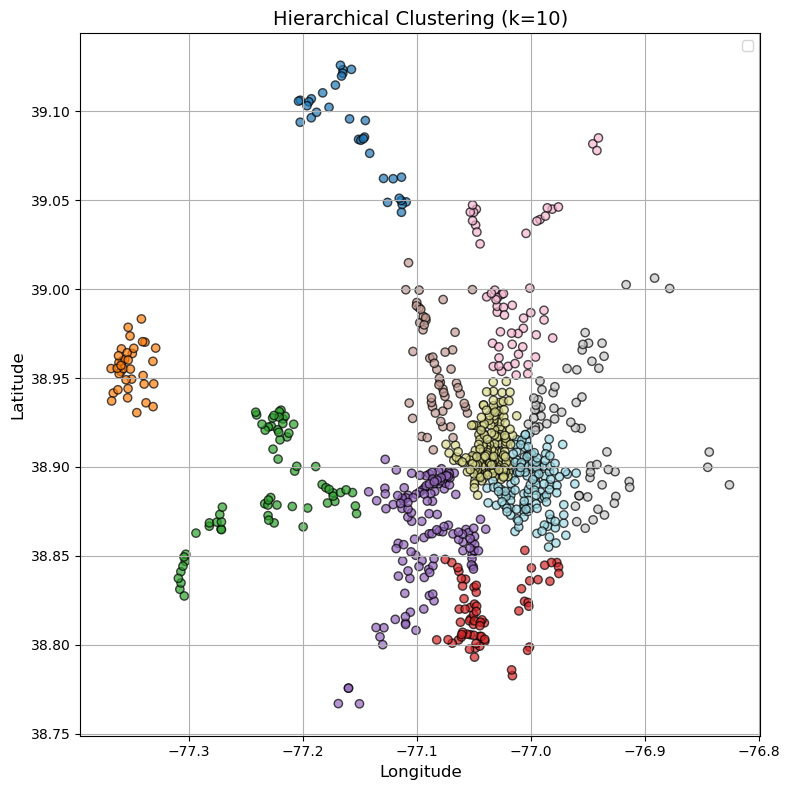

In [11]:
# Cut dendrogram to get k clusters
clusters = fcluster(Z, t=k, criterion='maxclust')
Stations['Cluster_hierarchical'] = clusters - 1  # Make clusters 0-indexed

# Plot the clustering results
plt.figure(figsize=(8, 8))
plt.scatter(X_station['Longitude'], X_station['Latitude'], c=clusters, cmap='tab20', edgecolor='k', alpha=0.7)

# Aesthetics
plt.title("Hierarchical Clustering (k=10)", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## <font color="red"> Task 7: </font>  Based on the previous results from the four types of clustering methods, briefly discuss your observations about the difference in their clustering patterns. [10 pts]

Answer:

The different clustering methods reveal distinct patterns in how bike docking stations are grouped. K-Means clustering, using Euclidean distance, forms relatively round, centralized clusters, but can be influenced by dense downtown areas, pulling centroids toward them. K-Medians clustering, based on Manhattan distance, results in more compact and elongated clusters, making it more robust to outliers and better suited to urban street layouts. K-Medoids clustering, where actual stations serve as cluster centers, provides practical groupings ideal for depot placement and operational purposes, as it identifies real, meaningful hubs. In contrast, hierarchical clustering does not assume spherical shapes and instead creates more natural but irregular groupings, capturing localized pockets of bike stations that reflect the underlying geographical distribution more organically. Overall, K-Means emphasizes mathematical neatness, K-Medians and K-Medoids offer more practical and resilient clustering for real-world applications, and hierarchical clustering highlights the natural structure of the bikeshare network.

## <font color="red"> Task 8: </font>  If you were the system planner, briefly discuss how you would like to evaluate these plans and decide on the clustering for crew deployment, from a practical point of view. [10 pts]

Answer:

As a system planner, evaluating these clustering plans for crew deployment should focus on operational efficiency, real-world accessibility, and service reliability rather than just mathematical clustering quality. Practically, I would prioritize clusters that group stations closely in terms of actual travel time (not just distance), minimize outlier stations, and ensure that each crew’s coverage area is geographically manageable within typical shift limits. K-Medoids would be highly attractive because the centers are actual bike stations, making it easier to set up depots or starting points for crews. I would also consider K-Medians if street layouts and traffic patterns (e.g., grid-like cities) make Manhattan distance more realistic for estimating travel efforts. Hierarchical clustering could help identify natural neighborhoods or districts, which might align well with political or administrative zones for assigning teams. Ultimately, the decision would involve simulating travel routes, crew workload balance, and response times under each clustering plan to pick the approach that best minimizes total operational cost and maximizes station service reliability.